In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
df=pd.read_csv("Mall_Customers.csv")

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [124]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [125]:
df.drop(['CustomerID','Genre','Age'],axis=1,inplace=True)

In [126]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [127]:
narr=df.values

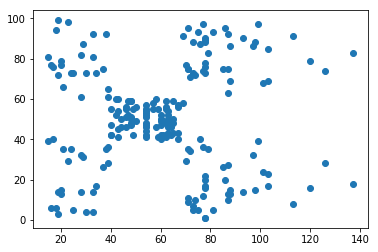

In [128]:
plt.scatter(x=narr[:,0],y=narr[:,1])

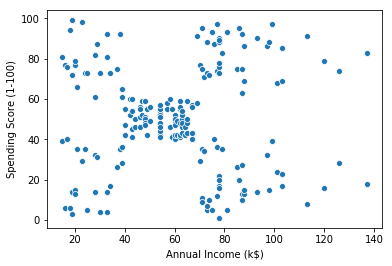

In [129]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [130]:
from sklearn.cluster import KMeans

In [131]:
km=KMeans(1)

In [132]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [133]:
km.inertia_

269981.28

In [134]:
km=KMeans(200)

In [135]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=200, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [136]:
km.inertia_

0.0

In [137]:
wcss=[]
for i in range(1,41):
    km=KMeans(i)
    km.fit(df)
    wcss.append(km.inertia_)
    
    

In [138]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30552.71402546729,
 25036.881008846227,
 21850.165282585633,
 19669.710998301216,
 17901.212513132865,
 15817.245013841313,
 14300.044641632876,
 13032.809431010166,
 11659.367540792542,
 10825.359284575075,
 10006.020323536113,
 9480.56812378443,
 8936.466244454608,
 8025.797524044583,
 7689.24048663325,
 7299.362062394128,
 6723.6809748222795,
 6550.1236234914195,
 6030.062978687978,
 5915.692857142857,
 5432.976785008115,
 5285.887906537906,
 5060.886781192664,
 4566.226661573721,
 4448.565284715284,
 4202.895292207792,
 3877.8444083694085,
 3886.829437229437,
 3549.342171717172,
 3493.450974025974,
 3217.3156204906204,
 3264.3338744588746,
 3060.2208624708624,
 2767.1481601731602]

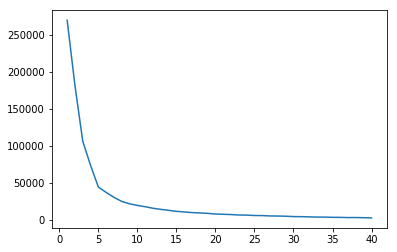

In [139]:
plt.plot(range(1,41),wcss)

in abow graph, graph rapidly decrese at the 5 that means there is the correct value for wcss.
Is also called elbow method.
raight cluster in this data set is 5, we can find using visualisation also(that done abow)


In [140]:
km=KMeans(5,init='k-means++')

In [141]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [142]:
km.inertia_

44448.45544793371

In [143]:
cluster=km.predict(df)

In [144]:
df['Clusters']=cluster

In [145]:
df.head()

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


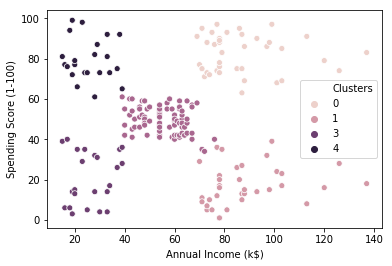

In [146]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=df['Clusters'])

In [147]:
cc=km.cluster_centers_

In [148]:
cc

array([[86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

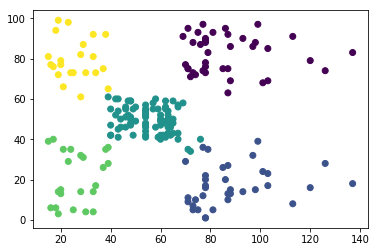

In [149]:
### In matplotlib c is used for colors or we can say different clusters like seaborn "hue"
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=df['Clusters'])

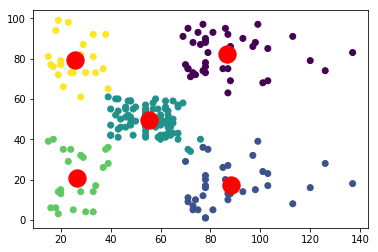

In [150]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=df['Clusters'])
plt.scatter(cc[:,0],cc[:,1],color='red',s=300)


In [151]:
narr=df.values

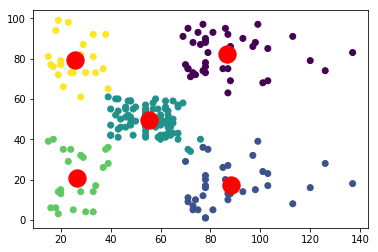

In [152]:
plt.scatter(narr[:,0],narr[:,1],c=df['Clusters'])
plt.scatter(cc[:,0],cc[:,1],color='red',s=300)


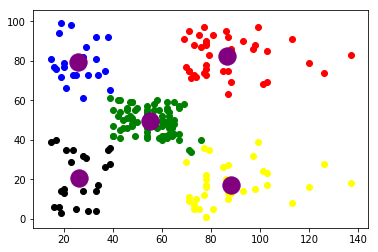

In [158]:
plt.scatter(narr[cluster==0,0],narr[cluster==0,1],c='red')
plt.scatter(narr[cluster==1,0],narr[cluster==1,1],c='yellow')
plt.scatter(narr[cluster==2,0],narr[cluster==2,1],c='green')
plt.scatter(narr[cluster==3,0],narr[cluster==3,1],c='black')
plt.scatter(narr[cluster==4,0],narr[cluster==4,1],c='blue')
plt.scatter(cc[:,0],cc[:,1],color='purple',s=300)
